# PROJECT CHURN PREDICTION

In [2]:
#importing common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
cp_frame = pd.read_csv("churn_prediction.csv")
cp_frame.shape

(28382, 21)

In [4]:
cp_frame.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
cp_frame.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,30301,2349,18,Male,0.0,student,1232.0,2,474,59.0,...,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


## Exploring the Data

In [6]:
cp_frame.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [7]:
cp_frame.describe(include = 'all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


## Starting with Univariate Analysis

In [8]:
import seaborn as sn
sn.set(style = 'darkgrid')

In [9]:
#Appending all the categorical variables in a separate list and doing the same for continuous variables 
categ = []
contin = []
for i in cp_frame.columns:
    if cp_frame[i].dtypes == 'object':
        categ.append(i)
    else:
        if i != 'churn':
            contin.append(i)

In [10]:
categ,contin

(['gender', 'occupation'],
 ['customer_id',
  'vintage',
  'age',
  'dependents',
  'city',
  'customer_nw_category',
  'branch_code',
  'days_since_last_transaction',
  'current_balance',
  'previous_month_end_balance',
  'average_monthly_balance_prevQ',
  'average_monthly_balance_prevQ2',
  'current_month_credit',
  'previous_month_credit',
  'current_month_debit',
  'previous_month_debit',
  'current_month_balance',
  'previous_month_balance'])

In [11]:
#Assigning different colors to a total of 18 for each of the continuous variable
colour = ['coral','red','green','blue','black','brown','crimson','purple','lime','blueviolet','darkorange',
          'orangered','violet','sienna','deepskyblue','olive','cyan','maroon']

#Defining index1 for the iterative value of axes[index1][]
index1 = []
for i in range(0,9):
    index1.append(i)
    index1.append(i)

#Defining index1 for the iterative value of axes[][index2]
c = 0
index2 = []
for j in range(1,19):
    index2.append(c)
    if c == 0:
        c = 1
    else:
        c = 0

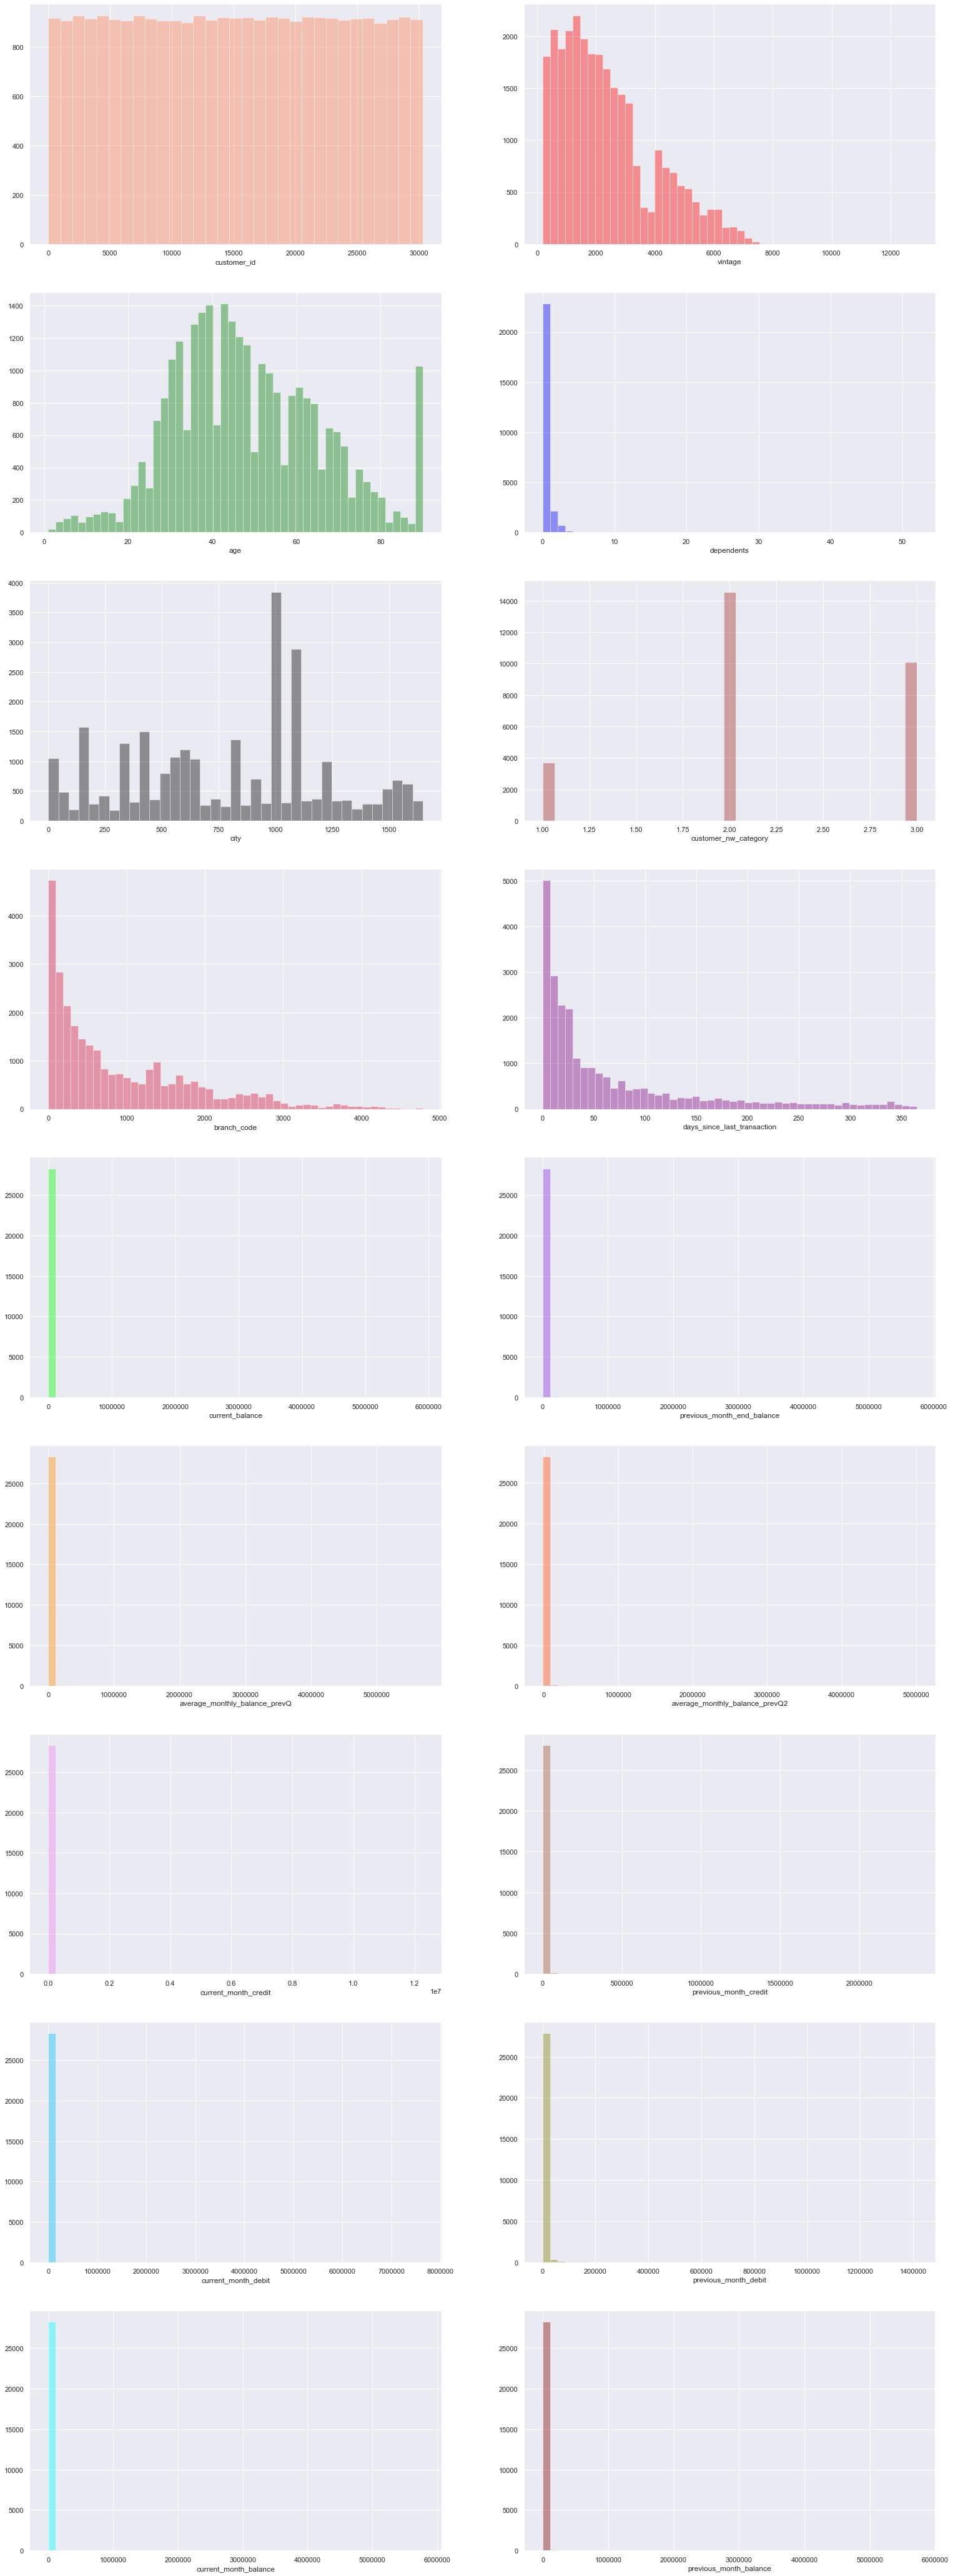

In [12]:
#Plotting the Histogram of all the continuous variables 
f, axes = plt.subplots(9, 2, figsize = (26, 75))
for i in range(len(contin)):
    sn.distplot(cp_frame[contin[i]], color = colour[i], ax = axes[index1[i], index2[i]], kde = False)

In [13]:
#After observation we see that the listed variables are non-symmetric
# 'vintage'
# 'branch_code'
# 'dependents'
# 'days_since_last_transaction'

Text(0.5, 0, 'Vintage')

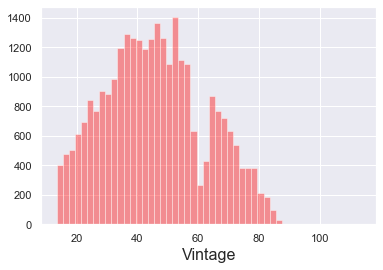

In [14]:
#treating 'vintage'
#Removing right skewness
sn.distplot(np.sqrt(cp_frame['vintage']), kde = False, color = 'red')
cp_frame['vintage'] = np.sqrt(cp_frame['vintage']) #Changing it with the original value of dataframe
plt.xlabel('Vintage',fontsize = 16)

Text(0.5, 0, 'Branch Code')

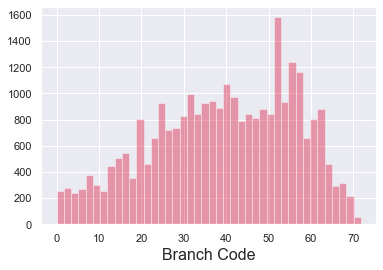

In [15]:
#treating 'branch_code'
#Removing right skewness
temps = np.log(cp_frame['branch_code'])
sn.distplot(np.square(temps), kde = False, color = 'crimson')
cp_frame['branch_code'] = np.square(temps) #Changing it with the original value of dataframe
plt.xlabel('Branch Code', fontsize = 16)

Text(0.5, 0, 'Dependents')

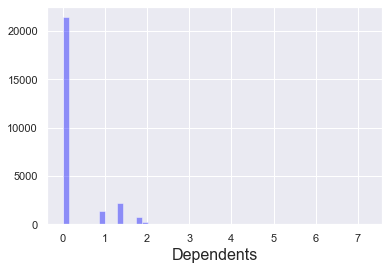

In [16]:
#treating 'dependents'
#Removing right skewness
sn.distplot(np.power(cp_frame['dependents'], 1/2), kde = False, color = 'blue')
plt.xlabel('Dependents', fontsize = 16)

#### After Plotting the histogram of the 'dependents' variable, we observe that it is having categorical properties

Text(0.5, 0, 'Days since last transaction')

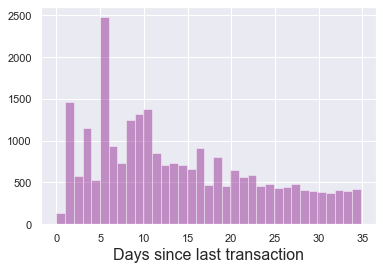

In [17]:
#treating 'days_since_last_transaction'
#Removing right skewness
temps = np.log(cp_frame['days_since_last_transaction']+0.1)
#Adding 0.1 so that a zero value could be irradicated for log operation
sn.distplot(np.square(temps), kde = False, color = 'purple')
cp_frame['days_since_last_transaction'] = np.square(temps) #Changing it with the original value of dataframe
plt.xlabel('Days since last transaction', fontsize = 16)

In [18]:
#Now plotting graphs for categorical variables

In [19]:
#After visualising the histogram we can make sure that
#the variables
#'customer_nw_category'
#'dependents'
#are categorical in nature.

In [20]:
#Adding them up in the category variable list
categ.append('customer_nw_category')
categ.append('dependents')
categ

['gender', 'occupation', 'customer_nw_category', 'dependents']

In [21]:
#As we have only 4 variables so slicing the index variables
indexc1 = index1[0:4]
indexc2 = index2[0:4]

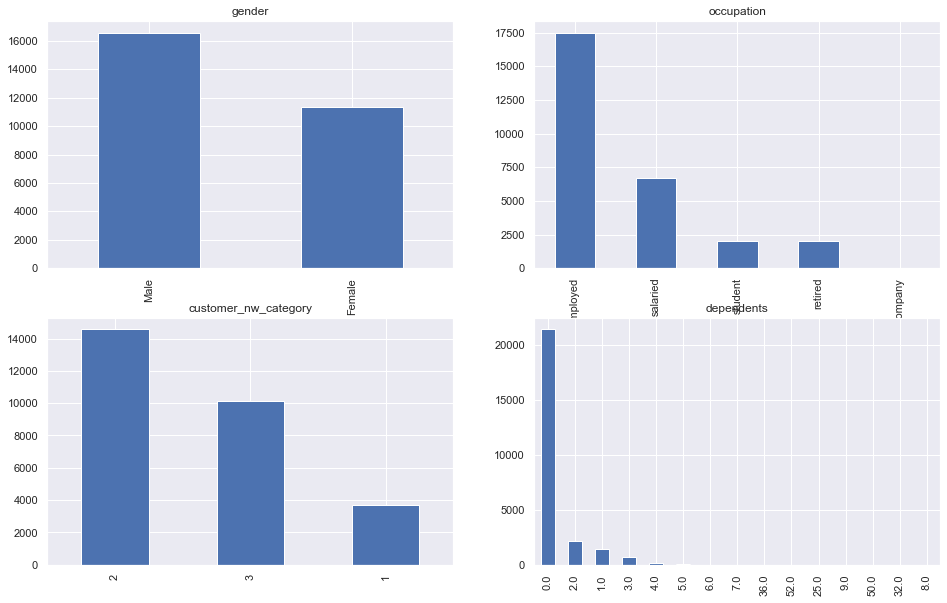

In [22]:
f, axes = plt.subplots(2, 2, figsize = (16, 10))
for j in range(len(categ)):
    cp_frame[categ[j]].value_counts().plot.bar(ax = axes[indexc1[j]][indexc2[j]], title = categ[j])

## Missing Value Treatment

In [23]:
#Examining missing values 
cp_frame.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [24]:
cp_frame.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,55.991071,66,Male,0.0,self_employed,187.0,2,43.913388,29.290744,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,17.606817,35,Male,0.0,self_employed,NaN,2,65.210011,16.777297,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,48.538644,31,Male,0.0,salaried,146.0,2,13.790617,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,21.863211,90,NaN,NaN,self_employed,1020.0,2,40.531946,24.911205,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,50.309045,42,Male,2.0,self_employed,1494.0,3,35.533585,16.501190,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,42.953463,10,Female,0.0,student,1020.0,2,50.351701,18.061844,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,70.135583,34,Female,0.0,self_employed,1046.0,2,29.237507,7.002241,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,17.233688,47,Male,0.0,salaried,1096.0,2,40.662647,5.301898,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,50.842895,50,Male,3.0,self_employed,1219.0,3,31.507207,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [25]:
#Appending all the missing categorical variables in a separate list and doing the same for continuous variables 
categ_missing = []
contin_missing = []
for i in cp_frame.columns:
    if cp_frame[i].isnull().sum()!=0:
        if cp_frame[i].dtypes == 'object':
            categ_missing.append(i)
        else:
            contin_missing.append(i)

In [26]:
categ_missing, contin_missing

(['gender', 'occupation'],
 ['dependents', 'city', 'days_since_last_transaction'])

In [27]:
for i in contin_missing:
    print('------'+i+'------')
    print('Median = ',cp_frame[i].median())
    print()

------dependents------
Median =  0.0

------city------
Median =  834.0

------days_since_last_transaction------
Median =  11.590791645112255



In [28]:
#Treating the missing values for Continuous variables
#Filling it with the median of that column

for i in contin_missing:
    cp_frame[i].fillna(cp_frame[i].median(),inplace = True)

In [29]:
for j in categ_missing:
    print('----------'+j+'----------')
    print(cp_frame[j].value_counts())
    print('\n')

----------gender----------
Male      16548
Female    11309
Name: gender, dtype: int64


----------occupation----------
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64




In [30]:
#Treating the missing values for Categorical variables
#Filling it with the mode of that column

for j in categ_missing:
    cp_frame[j].fillna(cp_frame[j].mode()[0],inplace = True)

In [31]:
cp_frame.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [32]:
cp_frame.dtypes

customer_id                         int64
vintage                           float64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                       float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [33]:
#Now according to the histogram plot and the dataset values we see that 
#the variables
#'vintage'
#'city'
#'branch_code'
#'days_since_last_transaction'
#should have a integer datatype

#whereas 
#the variables
#'dependents'
#'customer_nw_category'
#should be categorical in nature

In [34]:
cp_frame = cp_frame.astype({'dependents':'object', 'customer_nw_category': 'object', 
                            'vintage': 'int64', 'city': 'int64', 'branch_code': 'int64', 
                            'days_since_last_transaction':'int64'})

In [35]:
cp_frame.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                         object
occupation                         object
city                                int64
customer_nw_category               object
branch_code                         int64
days_since_last_transaction         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [36]:
#Performing Calculations on Variables
#Creating a list of items relating to balance and checking correlation of these with 'current_balance'
bal = ['previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_balance', 'previous_month_balance']

print('---------------------Correlation---------------------\n')
for i in bal:
    print('current_balance and ',i)
    print(cp_frame['current_balance'].corr(cp_frame[i]))
    print()

---------------------Correlation---------------------

current_balance and  previous_month_end_balance
0.9472755077987904

current_balance and  average_monthly_balance_prevQ
0.9583070699816738

current_balance and  average_monthly_balance_prevQ2
0.7145997660188935

current_balance and  current_month_balance
0.9834121512153574

current_balance and  previous_month_balance
0.94220714530421



#### So, we see that all these variables are highly correlated with 'current_balance' variable

In [37]:
colors = ['orangered', 'green', 'dodgerblue', 'red', 'purple']
index1 = [0,0,1,1,2]
index2 = [0,1,0,1,0]

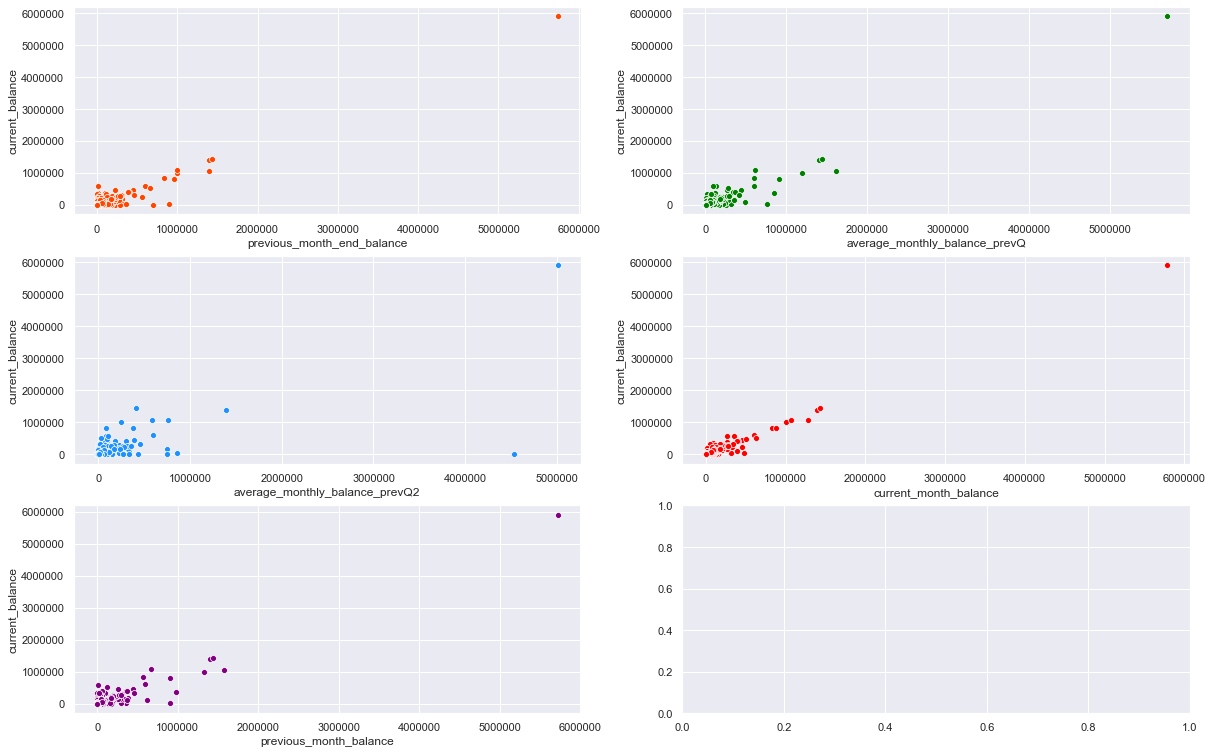

In [38]:
#Plotting scatterplot to analyse the relationship further
f, axes = plt.subplots(3,2, figsize = (20,13))
for i in range(len(bal)):
    sn.scatterplot(x = cp_frame[bal[i]], y = cp_frame['current_balance'], color = colors[i], ax = axes[index1[i],index2[i]])

#### Hence, we can see a linear relationship between all four variables versus 'current_balance'

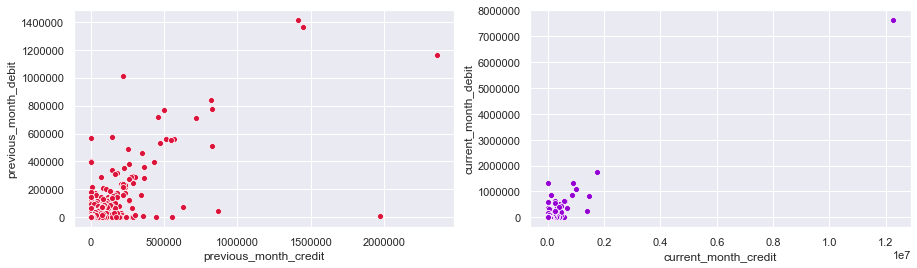

In [39]:
#Similarly plotting a scatterplot for credit and debit
f, axes = plt.subplots(1,2, figsize = (15, 4))
sn.scatterplot(x = cp_frame['previous_month_credit'], y = cp_frame['previous_month_debit'], color = 'crimson', ax = axes[0])
sn.scatterplot(x = cp_frame['current_month_credit'], y = cp_frame['current_month_debit'], color = 'darkviolet', ax = axes[1])

In [40]:
#Based on scatterplots creating new columns
net_bal = []
net_bal = cp_frame['current_balance'] + cp_frame['previous_month_end_balance'] + cp_frame['average_monthly_balance_prevQ'] + cp_frame['average_monthly_balance_prevQ2'] + cp_frame['current_month_balance'] + cp_frame['previous_month_balance']

In [41]:
#Similarly for credit
net_cred = []
net_cred = cp_frame['current_month_credit'] + cp_frame['previous_month_credit']

In [42]:
#Similarly for debit
net_deb = []
net_deb = cp_frame['current_month_debit'] + cp_frame['previous_month_debit']

In [43]:
cp_frame.insert(20,'net_balance',net_bal) #Adding a new column at index 20 of dataframe

In [44]:
cp_frame.insert(21,'net_credit',net_cred) #Adding a new column at index 21 of dataframe

In [45]:
cp_frame.insert(22,'net_debit',net_deb)   #Adding a new column at index 22 of dataframe

In [46]:
cp_frame.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,net_balance,net_credit,net_debit,churn
0,1,55,66,Male,0,self_employed,187,2,43,29,...,0.20,0.20,0.20,0.20,1458.71,1458.71,8742.62,0.40,0.40,0
1,2,17,35,Male,0,self_employed,834,2,65,16,...,0.56,0.56,5486.27,100.56,6496.78,8787.61,49598.09,1.12,5586.83,0
2,4,48,31,Male,0,salaried,146,2,13,11,...,0.61,0.61,6046.73,259.23,5006.28,5070.14,27530.98,1.22,6305.96,0
3,5,21,90,Male,0,self_employed,1020,2,40,24,...,0.47,0.47,0.47,2143.33,2291.91,1669.79,11636.60,0.94,2143.80,1
4,6,50,42,Male,2,self_employed,1494,3,35,16,...,0.33,714.61,588.62,1538.06,1157.15,1677.16,8678.18,714.94,2126.68,1


In [47]:
#Now, converting all the categorical variable values to numerics to further perform operations of sklearn library
cp_frame = pd.get_dummies(cp_frame)

In [48]:
len(cp_frame.columns)

45

## Starting with Prediction process

#### Division of Independent and Dependent Variables

In [49]:
x = cp_frame.drop(['churn'], axis=1)
y = cp_frame['churn']

#### As our datset is having outliers, therefore using the RobustScaler() which Scale features using statistics that are robust to outliers.

In [50]:
from sklearn.preprocessing import RobustScaler

In [51]:
scaler = RobustScaler()

In [52]:
scaled_x = scaler.fit_transform(x)

In [53]:
x = pd.DataFrame(scaled_x, columns = x.columns)

In [54]:
x.head()

,customer_id,vintage,age,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,dependents_50.0,dependents_52.0,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,-1.000000,0.478261,0.833333,-0.941776,0.115385,1.384615,-0.375678,-0.404419,-0.464597,-0.407758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.999934,-1.173913,-0.458333,0.000000,0.961538,0.384615,0.434748,1.120873,0.948830,1.933604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.999802,0.173913,-0.625000,-1.001456,-1.038462,0.000000,0.130253,0.512653,0.304798,-0.116031,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0
3,-0.999736,-1.000000,1.833333,0.270742,0.000000,1.000000,-0.203932,-0.229028,-0.325088,-0.502205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.999670,0.260870,-0.166667,0.960699,-0.192308,0.384615,-0.485130,-0.416415,-0.423446,-0.317681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0


In [55]:
#division of train and test data
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, random_state = 101, stratify = y)

In [56]:
#Creating an Ensemble Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
#Prediction based on Logistic Regression
Model_1 = LogisticRegression()
Model_1.fit(train_x,train_y)
pred_1 = Model_1.predict(valid_x)
Model_1.score(valid_x, valid_y) #Prediction Percentage

0.8244081172491544

In [58]:
#Prediction based on K-Nearest-Neighbors
Model_2 = KNeighborsClassifier(n_neighbors = 6)
Model_2.fit(train_x,train_y)
pred_2 = Model_2.predict(valid_x)
Model_2.score(valid_x, valid_y) #Prediction Percentage

0.8286358511837655

In [59]:
#Prediction based on Decision Tree
Model_3 = DecisionTreeClassifier(max_depth = 8)
Model_3.fit(train_x,train_y)
pred_3 = Model_3.predict(valid_x)
Model_3.score(valid_x, valid_y) #Prediction Percentage

0.8532976324689966

In [60]:
#Now, creating a final array in which we append the mode of all the three models
from statistics import mode
Final_pred = np.array([])
for i in range(0,len(valid_x)):
    Final_pred = np.append(Final_pred, mode([pred_1[i], pred_2[i], pred_3[i]]))

In [61]:
#Importing evaluation metric
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(valid_y, Final_pred)*100 #Accuracy Score from all the three models

83.62457722660653

In [63]:
#Prediction based on Random Forest
Model_4 = RandomForestClassifier(n_estimators = 100, max_depth = 20)
Model_4.fit(train_x,train_y)
pred_4 = Model_4.predict(valid_x)
Model_4.score(valid_x, valid_y)*100 #Prediction Percentage

86.6685456595265

### Hence, we see that the best score comes from the model of random forest.